## Import bibliotheques necessaires

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import array
from numpy import mean
from numpy import cov
#pour les vecteurs la linalg
from numpy.linalg import eig
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.metrics import roc_curve, auc

## Importation de la base de données

In [2]:
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv', header=0)

## Comprehension des données

In [3]:
print("presence des valeurs Nan :",df.isnull().values.any())

presence des valeurs Nan : False


In [4]:
df.columns.values
#afficher les noms des colonnes

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [5]:
#verification des types des données
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
#supprimer costumed id
df2 = df.iloc[:,1:]
df2=df2.drop("gender",axis=1)
df2.head()


,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


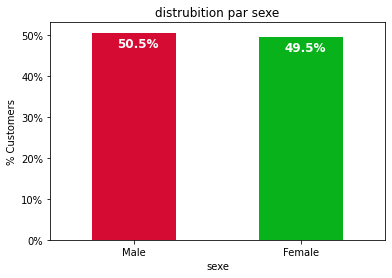

In [7]:
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
colors = ['#D60B33','#08B21A']
ax = (df['gender'].value_counts()*100.0 /len(df)).plot(kind='bar',stacked = True,rot = 0,color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers')
ax.set_xlabel('sexe')
ax.set_ylabel('% Customers')
ax.set_title('distrubition par sexe')

#creattion de la liste
totals = []

#trouver les valeurs et les ajouter dans la liste
for i in ax.patches:
    totals.append(i.get_width())

# 
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

In [8]:
#on peut conclure que la distrubution est équilibrée

Text(0.5, 1.0, '% of Sénior citoyen')

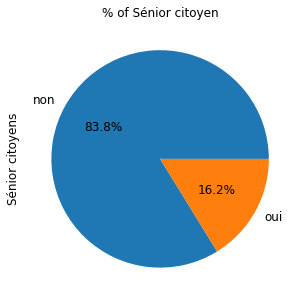

In [9]:
ax = (df['SeniorCitizen'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['non', 'oui'],figsize =(5,5), fontsize = 12 )                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Sénior citoyens',fontsize = 12)
ax.set_title('% of Sénior citoyen', fontsize = 12)

## Il n'y a que 16% des clients qui sont des seniors. Ainsi, la plupart de nos clients dans les données sont des personnes plus jeunes

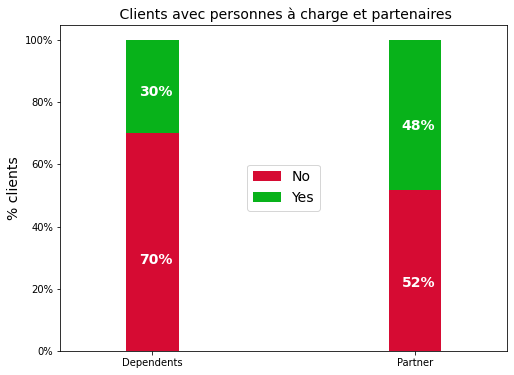

In [10]:
df4 = pd.melt(df, id_vars=['customerID'], value_vars=['Dependents','Partner'])
df5 = df4.groupby(['variable','value']).count().unstack()
df5 = df5*100/len(df)
colors = ['#D60B33','#08B21A']
ax = df5.loc[:,'customerID'].plot.bar(stacked=True, color=colors,
                                      figsize=(8,6),rot = 0,
                                     width = 0.2)

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% clients',size = 14)
ax.set_xlabel('')
ax.set_title(' Clients avec personnes à charge et partenaires',size = 14)
ax.legend(loc = 'center',prop={'size':14})

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)


## Environ 50% des clients ont un partenaire, tandis que seulement 30% du total des clients ont des personnes à charge.

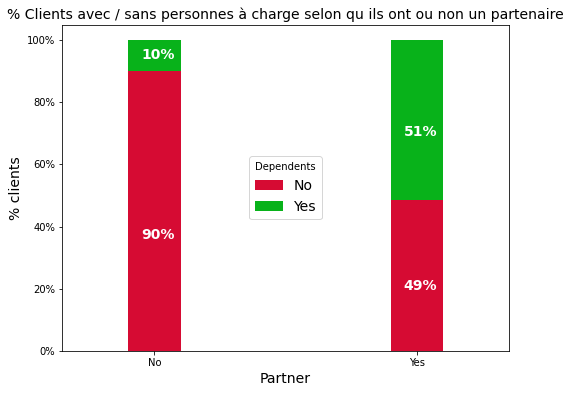

In [11]:
colors = ['#D60B33','#08B21A']
partner_dependents = df.groupby(['Partner','Dependents']).size().unstack()

ax = (partner_dependents.T*100.0 / partner_dependents.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Dependents',fontsize =14)
ax.set_ylabel('% clients',size = 14)
ax.set_title('% Clients avec / sans personnes à charge selon qu ils ont ou non un partenaire',size = 14)
ax.xaxis.label.set_size(14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',
               size = 14)

## Il est intéressant de noter que parmi les clients qui ont un partenaire, seulement environ la moitié d'entre eux ont également
#### une personne à charge, tandis que l'autre moitié est independante. 
#### De plus, comme prévu, parmi les clients qui n'ont pas de partenaire, une majorité (90%) d'entre eux n'ont pas de personnes à charge.

Text(0.5, 1.0, ' des clients de par leur ancienneté')

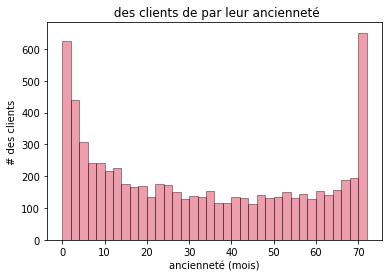

In [12]:
ax = sns.distplot(df['tenure'], hist=True, kde=False, 
             bins=int(180/5), color = '#D60B33', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('# des clients')
ax.set_xlabel('ancienneté (mois)')
ax.set_title(' des clients de par leur ancienneté')

# Durée du mandat: 
#### après avoir regardé l'histogramme ci-dessous, nous pouvons voir que de nombreux clients travaillent avec la société 
#### de télécommunications depuis un mois seulement, alors que beaucoup sont là depuis environ 72 mois. 
#### Cela peut être dû au fait que différents clients ont des contrats différents. 
#### Ainsi, en fonction du contrat dans lequel ils ont souscrit, 
#### il pourrait être plus / moins facile pour les clients de rester / quitter l'entreprise de télécommunications.

Text(0.5, 1.0, 'les clients par type de contrat')

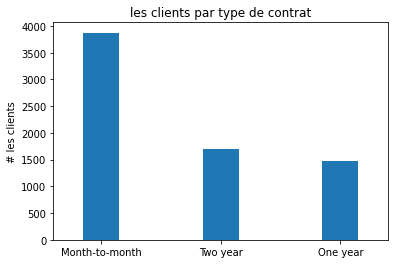

In [13]:
ax = df['Contract'].value_counts().plot(kind = 'bar',rot = 0, width = 0.3)
ax.set_ylabel('# les clients')
ax.set_title('les clients par type de contrat')

#### la plupart des clients sont dans le contrat mensuel. 
#### Alors qu'il y a un nombre égal de clients dans les contrats de 1 an et 2 ans.

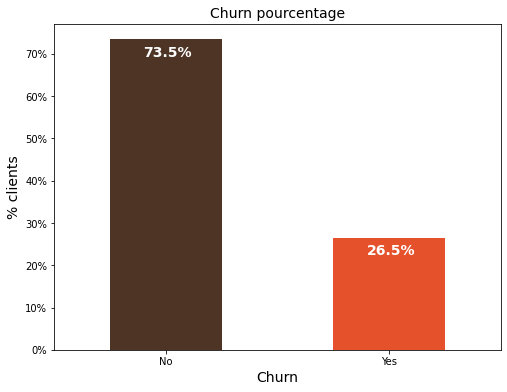

In [14]:
colors = ['#4D3425','#E4512B']
ax = (df['Churn'].value_counts()*100.0 /len(df)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors,
                                                                         figsize = (8,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% clients',size = 14)
ax.set_xlabel('Churn',size = 14)
ax.set_title('Churn pourcentage', size = 14)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold',
           size = 14)

##### Dans nos données, 74% des clients n'abandonnent pas. 

# Data preprocessing

In [15]:
#convertir totalcharges en numérique
df2.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df2.dtypes
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7043 non-null   int64  
 1   Partner           7043 non-null   object 
 2   Dependents        7043 non-null   object 
 3   tenure            7043 non-null   int64  
 4   PhoneService      7043 non-null   object 
 5   MultipleLines     7043 non-null   object 
 6   InternetService   7043 non-null   object 
 7   OnlineSecurity    7043 non-null   object 
 8   OnlineBackup      7043 non-null   object 
 9   DeviceProtection  7043 non-null   object 
 10  TechSupport       7043 non-null   object 
 11  StreamingTV       7043 non-null   object 
 12  StreamingMovies   7043 non-null   object 
 13  Contract          7043 non-null   object 
 14  PaperlessBilling  7043 non-null   object 
 15  PaymentMethod     7043 non-null   object 
 16  MonthlyCharges    7043 non-null   float64


In [16]:
df2.isnull().sum()

SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

#### on trouve 11 valeur Nan donc va les supprimer


In [17]:
df2.dropna(inplace = True)
df2.isnull().sum()

SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### convertir les variables independantes


In [18]:
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No',  value=0, inplace=True)

### Convertissons toutes les variables catégorielles en variables factices


In [19]:
df3 = pd.get_dummies(df2, prefix_sep='_', drop_first=True)
df3.dtypes

SeniorCitizen                              int64
tenure                                     int64
MonthlyCharges                           float64
TotalCharges                             float64
Churn                                      int64
Partner_Yes                                uint8
Dependents_Yes                             uint8
PhoneService_Yes                           uint8
MultipleLines_No phone service             uint8
MultipleLines_Yes                          uint8
InternetService_Fiber optic                uint8
InternetService_No                         uint8
OnlineSecurity_No internet service         uint8
OnlineSecurity_Yes                         uint8
OnlineBackup_No internet service           uint8
OnlineBackup_Yes                           uint8
DeviceProtection_No internet service       uint8
DeviceProtection_Yes                       uint8
TechSupport_No internet service            uint8
TechSupport_Yes                            uint8
StreamingTV_No inter

# ACP

### Normalisation

In [20]:
from sklearn.preprocessing import StandardScaler
features = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
         'Partner_Yes', 'Dependents_Yes',
       'PhoneService_Yes', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No internet service',
       'TechSupport_Yes', 'StreamingTV_No internet service',
       'StreamingTV_Yes', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_One year', 'Contract_Two year',
       'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']
# Separating out the features
x = df3.loc[:, features].values
# Separating out the target
y = df3.loc[:,['Churn']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)
x

array([[-0.44032709, -1.28024804, -1.16169394, ..., -0.5253508 ,
         1.40476387, -0.54360352],
       [-0.44032709,  0.06430269, -0.26087792, ..., -0.5253508 ,
        -0.71186341,  1.83957601],
       [-0.44032709, -1.23950408, -0.36392329, ..., -0.5253508 ,
        -0.71186341,  1.83957601],
       ...,
       [-0.44032709, -0.87280842, -1.17000405, ..., -0.5253508 ,
         1.40476387, -0.54360352],
       [ 2.27103902, -1.15801615,  0.31916782, ..., -0.5253508 ,
        -0.71186341,  1.83957601],
       [-0.44032709,  1.36810945,  1.35793167, ..., -0.5253508 ,
        -0.71186341, -0.54360352]])

In [21]:
#Analyse en composantes principales avec PCA de "scikit-learn"
from sklearn.decomposition import PCA
#instanciation de l'objet
acp = PCA(svd_solver='full')
# Affichage des paramètres
print(acp)

PCA(svd_solver='full')


#### Supprimer costumer churn


In [22]:
df4 = df3.drop(['Churn'], axis=1)
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 29 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7032 non-null   int64  
 1   tenure                                 7032 non-null   int64  
 2   MonthlyCharges                         7032 non-null   float64
 3   TotalCharges                           7032 non-null   float64
 4   Partner_Yes                            7032 non-null   uint8  
 5   Dependents_Yes                         7032 non-null   uint8  
 6   PhoneService_Yes                       7032 non-null   uint8  
 7   MultipleLines_No phone service         7032 non-null   uint8  
 8   MultipleLines_Yes                      7032 non-null   uint8  
 9   InternetService_Fiber optic            7032 non-null   uint8  
 10  InternetService_No                     7032 non-null   uint8  
 11  Onli

## Preprocessing

## TrainSet - TestSet


In [23]:
from sklearn.model_selection import train_test_split

In [24]:
trainset,testset = train_test_split(df3,test_size=0.25,random_state=0)

In [25]:
trainset['Churn'].value_counts()

0    3852
1    1422
Name: Churn, dtype: int64

In [26]:
testset['Churn'].value_counts()

0    1311
1     447
Name: Churn, dtype: int64

In [27]:
def preprocessing(df):
    for column in df.columns:
        if df.dtypes[column] =='object':  
            df[column]=pd.factorize(df[column])[0] 
    X= df.drop('Churn',axis=1)
    Y= df['Churn']
    return X,Y
    

In [28]:
X_train , y_train = preprocessing(trainset)

In [29]:
X_test , y_test= preprocessing(testset)

# Modelisation

# 1 Decision tree 

In [30]:
from sklearn.tree import DecisionTreeClassifier


In [31]:
DecisionTree=DecisionTreeClassifier()

## Procedure d'evaluation

In [32]:
from sklearn.metrics import f1_score,confusion_matrix,classification_report

## Evaluation

In [33]:
def evaluation(model):
    from sklearn.metrics import plot_confusion_matrix
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)    
    plot_confusion_matrix(model, X_test, y_test,display_labels=df.Churn.unique(),cmap=plt.cm.Blues)
    print(classification_report(y_test, ypred))    

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1311
           1       0.45      0.45      0.45       447

    accuracy                           0.72      1758
   macro avg       0.63      0.63      0.63      1758
weighted avg       0.72      0.72      0.72      1758

Wall time: 106 ms


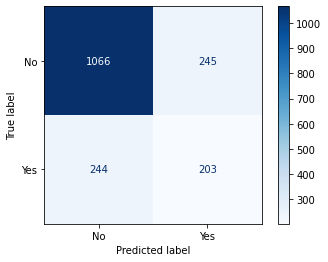

In [34]:
%time evaluation(DecisionTree)

## Appliquant GridSearchCV

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1311
           1       0.62      0.53      0.57       447

    accuracy                           0.80      1758
   macro avg       0.73      0.71      0.72      1758
weighted avg       0.79      0.80      0.79      1758



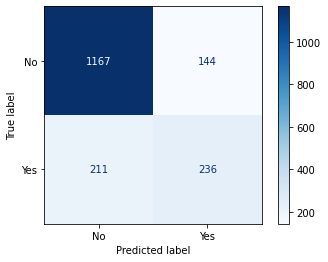

In [35]:
from sklearn.model_selection import GridSearchCV
param_grid = {'criterion': ['gini', 'entropy'],
              'max_depth': np.arange(1,29)}
gridDecisionTree=GridSearchCV(DecisionTreeClassifier(),param_grid,cv=6)
gridDecisionTree.fit(X_train,y_train)
evaluation(gridDecisionTree.best_estimator_)


## Roc

In [37]:
ypred = gridDecisionTree.best_estimator_.predict(X_test)
fprTree, tprTree, thresholdTree = roc_curve(y_test,ypred)
rocTree = auc(fprTree, tprTree)

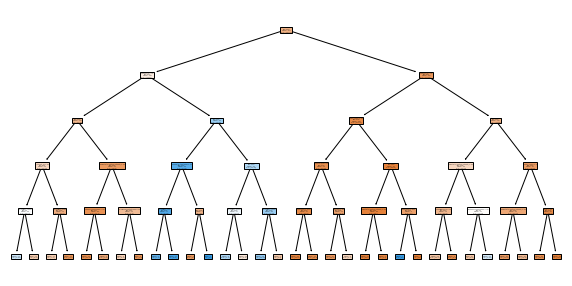

In [38]:
import matplotlib.pyplot as plt 
from sklearn.tree import plot_tree
plt.figure(figsize=(10, 5))
plot_tree(gridDecisionTree.best_estimator_, feature_names=df3.columns, filled=True)
plt.show()

# 2 Knn 

In [39]:
from sklearn.neighbors import KNeighborsClassifier
Knn=KNeighborsClassifier()

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1311
           1       0.55      0.44      0.49       447

    accuracy                           0.77      1758
   macro avg       0.69      0.66      0.67      1758
weighted avg       0.75      0.77      0.76      1758



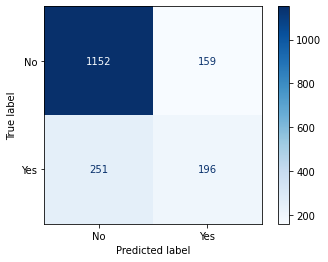

In [40]:
evaluation(Knn)

## Roc KNN

In [41]:
ypred = Knn.predict(X_test)
fprKnn, tprKnn, thresholdKnn = roc_curve(y_test,ypred)
rocKnn = auc(fprKnn, tprKnn)

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      1311
           1       0.67      0.40      0.50       447

    accuracy                           0.80      1758
   macro avg       0.75      0.67      0.69      1758
weighted avg       0.78      0.80      0.78      1758



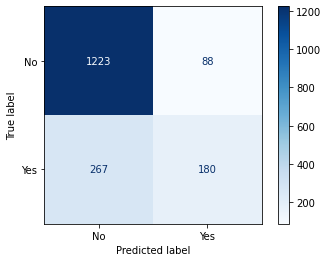

In [42]:
evaluation(KNeighborsClassifier(n_neighbors=23))

Text(0, 0.5, 'Erreur')

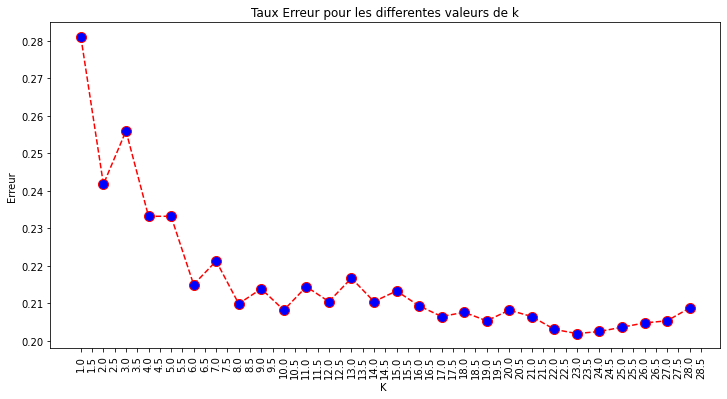

In [43]:
error = []
for i in range(1, 29):
    knn = KNeighborsClassifier(i)
    knn_model = knn.fit(X_train, y_train)
    pred_i = knn_model.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 29), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Taux Erreur pour les differentes valeurs de k')
plt.xlabel('K ')
plt.xticks(np.arange(1, 29, 0.5),rotation=90)
plt.ylabel('Erreur')

              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1311
           1       0.61      0.47      0.53       447

    accuracy                           0.79      1758
   macro avg       0.72      0.68      0.70      1758
weighted avg       0.78      0.79      0.78      1758



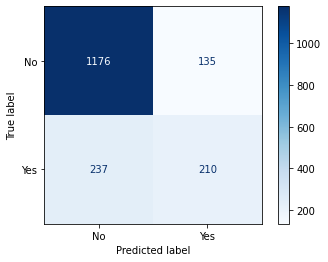

In [44]:
from sklearn.ensemble import RandomForestClassifier
RandomForest = RandomForestClassifier()
evaluation(RandomForest)

## Logistic Regression

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1311
           1       0.65      0.51      0.57       447

    accuracy                           0.81      1758
   macro avg       0.75      0.71      0.72      1758
weighted avg       0.80      0.81      0.80      1758



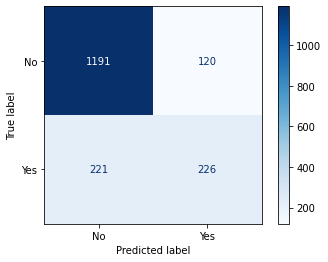

In [45]:
from sklearn.linear_model import LogisticRegression
LogisticRegression=LogisticRegression()
evaluation(LogisticRegression)

## GridSearchCV Logistic Regression

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1311
           1       0.65      0.51      0.57       447

    accuracy                           0.81      1758
   macro avg       0.75      0.71      0.72      1758
weighted avg       0.80      0.81      0.80      1758



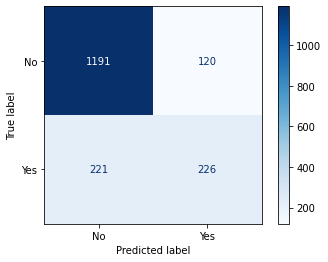

In [46]:
param_grid={'penalty': ['l1', 'l2', 'elasticnet', 'none'],
          'max_iter': [100,1000, 2000, 3000]}
grid_LogisticRegression=GridSearchCV(LogisticRegression,param_grid,cv=5)
grid_LogisticRegression.fit(X_train,y_train)
evaluation(grid_LogisticRegression.best_estimator_)

## ROC Logistic Regression

In [47]:
ypred = grid_LogisticRegression.best_estimator_.predict(X_test)
fprLR, tprLR, thresholdLR = roc_curve(y_test,ypred)
rocLR = auc(fprLR, tprLR)

# Naive Bayes

              precision    recall  f1-score   support

           0       0.93      0.60      0.73      1311
           1       0.43      0.86      0.57       447

    accuracy                           0.67      1758
   macro avg       0.68      0.73      0.65      1758
weighted avg       0.80      0.67      0.69      1758



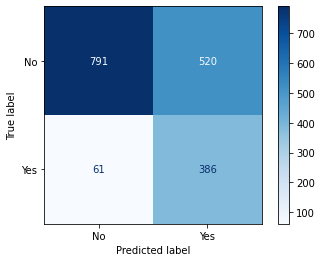

In [48]:
from sklearn.naive_bayes import GaussianNB
GaussianNB = GaussianNB()
GaussianNB.fit(X_train,y_train)
evaluation(GaussianNB)

## Roc Naive

In [49]:
ypred = GaussianNB.predict(X_test)
fprNB, tprNB, thresholdNB = roc_curve(y_test,ypred)
rocNB = auc(fprNB, tprNB)

## RandomForest

In [57]:
from sklearn.ensemble import RandomForestClassifier
rf_model_initial = RandomForestClassifier(n_estimators =25, random_state = 1)
rf_model_initial.fit(X_train,y_train)
y_pred_rf = rf_model_initial.predict(X_test)
print("Random Forest accuracy for 25 trees is :",rf_model_initial.score(X_test,y_test))

Random Forest accuracy for 25 trees is : 0.7787258248009101


## GridSearchCV RandomForest

In [ ]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv= 2)
CV_rfc.fit(X_train, y_train)
%time evaluation(CV_rfc.best_estimator_)

In [55]:
ypred = rf_model_initial.predict(X_test)
fprRF, tprRF, thresholdRF = roc_curve(y_test,ypred)
rocRF = auc(fprRF, tprRF)

In [ ]:
from xgboost import XGBClassifier                         
import xgboost as xgb
model_xgb=XGBClassifier()
evaluation(model)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

param_test1 = {
 'max_depth':[4,5,6],
  'min_child_weight':[6,8,10,12],
     'gamma':[i/10.0 for i in range(0,5)],
   'subsample':[i/100.0 for i in range(75,90,5)],
 'colsample_bytree':[i/100.0 for i in range(75,90,5)],
     'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05]
}
search_boost=GridSearchCV(XGBClassifier(),param_grid=param_test1,n_iter=10,cv=5,random_state=1)
search_boost.fit(X_train,y_train)

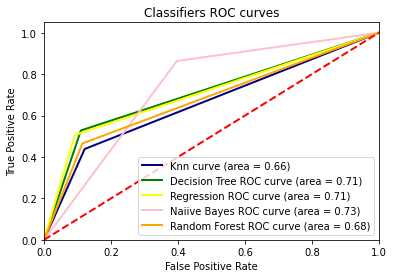

In [56]:
plt.figure() 
plt.plot(fprKnn, tprKnn, color='navy', lw=2, label='Knn curve (area = %0.2f)'% rocKnn)
plt.plot(fprTree, tprTree, color='green', lw=2, label='Decision Tree ROC curve (area = %0.2f)'% rocTree)
plt.plot(fprLR, tprLR, color='yellow', lw=2, label='Regression ROC curve (area = %0.2f)'% rocLR)
#plt.plot(fpr2, tpr2, color='red', lw=2, label='SVM curve (area = %0.2f)'% roc_auc2)
plt.plot(fprNB, tprNB, color='pink', lw=2, label='Naiive Bayes ROC curve (area = %0.2f)'% rocNB)
plt.plot(fprRF, tprRF, color='orange', lw=2, label='Random Forest ROC curve (area = %0.2f)'% rocRF)



plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--') 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Classifiers ROC curves') 
plt.legend(loc = "lower right")
plt.show()

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
param_grid= {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['linear','rbf', 'poly', 'sigmoid'],
            } 
search_svc=RandomizedSearchCV(SVC(),param_distributions=param_grid,n_iter=2,cv=2,random_state=1)
search_svc.fit(X_train,y_train)
search_svc.best_score_

In [77]:
df3

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,1,1,1,0,1,...,0,1,0,1,1,0,1,0,0,1
7039,0,72,103.20,7362.90,0,1,1,1,0,1,...,0,1,0,1,1,0,1,1,0,0
7040,0,11,29.60,346.45,0,1,1,0,1,0,...,0,0,0,0,0,0,1,0,1,0
7041,1,4,74.40,306.60,1,1,0,1,0,1,...,0,0,0,0,0,0,1,0,0,1
